# Importing the required libraries :

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler

# Loading data:

In [2]:
df=pd.read_csv('Leads.csv')

In [3]:
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [4]:
df.shape

# Initially there are total 9240 rows and 37 columns

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Dealing with the missing data:

 * Here in many rows we can see that our data is filled with a defalut value 'Select'
 * We must consider these entries as null value
 * Replacing 'Select' as nan

In [7]:
df.replace('Select',np.nan,inplace=True)

In [8]:
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


# Checking for the duplicate entries if we have any:

In [9]:
df['Prospect ID'].duplicated().sum()

0

In [10]:
#Since the sum come out to be 0 this means we don't have any duplicate entries in our Data.

# Checking for the null values:

In [11]:
null= df.isnull().mean()*100
null

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

# 
 * As we can see that there are few columns where more than 55 percent of data if missing 
 * Droping those columns where more than 55 percent of data is missing.

In [12]:
df=df.drop(columns=df.columns[df.isnull().mean()>0.55])

In [13]:
df.shape

(9240, 35)

In [14]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
#sns.countplot(x=df['Lead Origin'],hue='Converted',data = df)


# 
 
 * A lead number assigned to each lead procured.
 * It is not going to help us in future analysis so, droping the column 'Lead Number'
 

In [17]:
df=df.drop(columns='Lead Number')

In [18]:
df['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

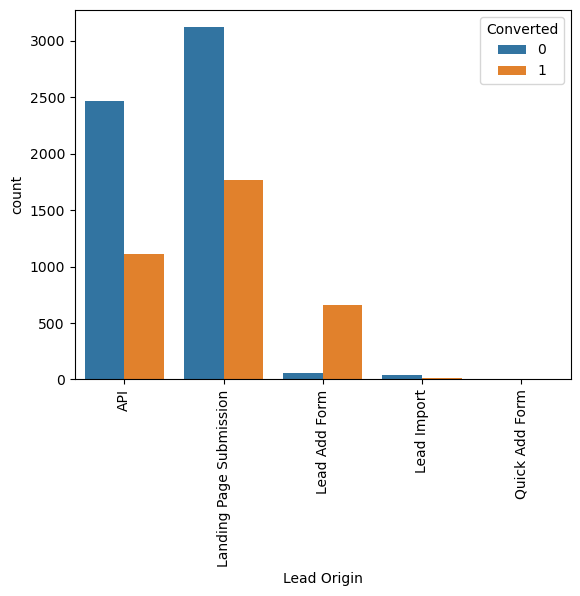

In [19]:
sns.countplot(x=df['Lead Origin'],hue='Converted',data = df)
plt.xticks(rotation=90)
plt.show()


# Insights from above plot:
 
 * From 'API' and 'Landing Page Submission' the number of leads are very high but less than 50% out of it is getting converted.
 * From 'Lead Add Form' the number of leads are very low but the conversion percent out of it very high.
 * From 'Lead Import' number of lead and converted rate both are very low.
 * From 'Quick Add Form' number of lead and converted rate both are very low and it can be ignnored.
 

In [20]:
df['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [21]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

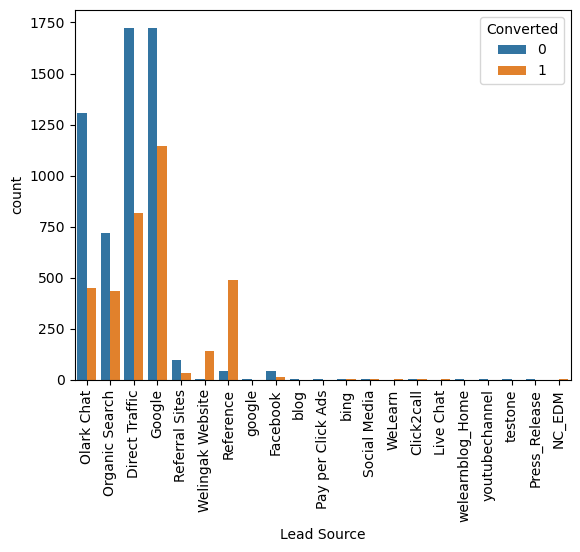

In [22]:
sns.countplot(x=df['Lead Source'],hue='Converted',data = df)
plt.xticks(rotation=90)
plt.show()

In [23]:
df['Lead Source']=df['Lead Source'].replace('google','Google')
df['Lead Source']=df['Lead Source'].replace(['nan', 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'],'Unknown')

In [24]:
df['Lead Source']=df['Lead Source'].replace(np.nan,'Google')

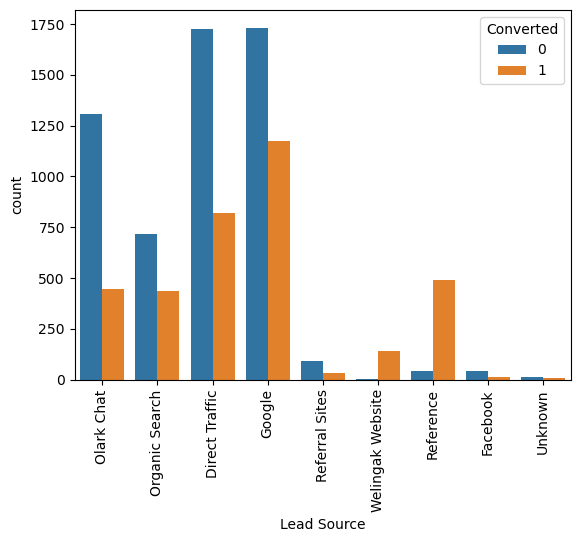

In [25]:
sns.countplot(x=df['Lead Source'],hue='Converted',data = df)
plt.xticks(rotation=90)
plt.show()

# Insights from above plot:
 
 * The number of leads from Olark Chat is high, but the conversion rate is significantly low at around 30%.
 *The number of customers converted from Organic Search is very good compared to the number of leads.
 *The number of customers converted from Direct Traffic is almost half of the number of leads.
 *The number of leads from Google is high, and the number of converted customers is also high, which is really good.
 *The number of leads from Welingak Website and Reference is very low, but the conversion rate is very high. We need to focus on increasing the number    of leads there.

In [26]:
df['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [27]:
df['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [28]:
df['Lead Quality']=df['Lead Quality'].replace(np.nan,'Unknown')

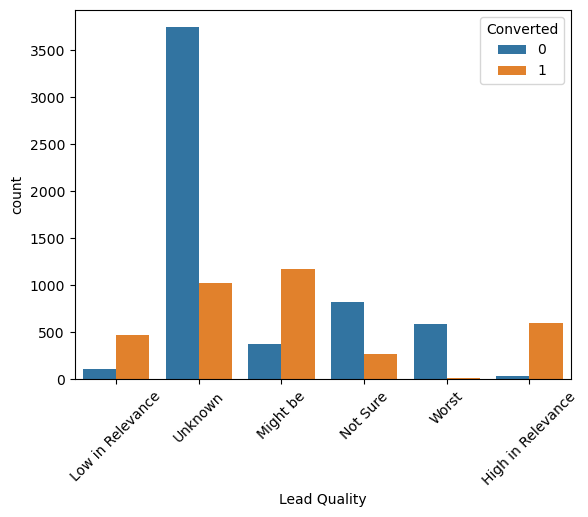

In [29]:
sns.countplot(x=df['Lead Quality'],hue='Converted',data=df)
plt.xticks(rotation=45)
plt.show()

# Insights from above plot:
 
 * In 'Lead Quality' most of the data is Unkown which is not going to help us in analysis. So, we can drop this
   column.

In [30]:
df=df.drop(columns='Lead Quality')

In [31]:
df['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

# 
  * Since Mumbai is ouccuring most of the time in columns so we can fill the missing city values with Mumbai.

In [32]:
df['City']=df['City'].fillna('Mumbai')

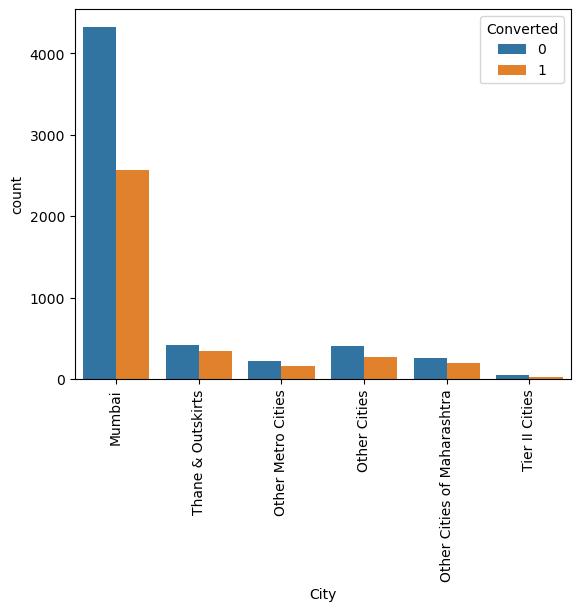

In [33]:
sns.countplot(x=df['City'],hue='Converted',data = df)
plt.xticks(rotation=90)
plt.show()

In [34]:
df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [35]:
round(df.isnull().mean()*100,2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [36]:
df['Asymmetrique Activity Index'].describe()

count          5022
unique            3
top       02.Medium
freq           3839
Name: Asymmetrique Activity Index, dtype: object

In [37]:
df['Asymmetrique Activity Index']=df['Asymmetrique Activity Index'].fillna('02.Medium')

In [38]:
df['Asymmetrique Profile Index'].describe()

count          5022
unique            3
top       02.Medium
freq           2788
Name: Asymmetrique Profile Index, dtype: object

In [39]:
df['Asymmetrique Profile Index']=df['Asymmetrique Profile Index'].fillna('02.Medium')

In [40]:
df['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

In [41]:
df['Asymmetrique Activity Score']=df['Asymmetrique Activity Score'].fillna(14.306252)

In [42]:
df['Asymmetrique Profile Score'].describe()

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

In [43]:
df['Asymmetrique Profile Score']=df['Asymmetrique Profile Score'].fillna(16.344883)

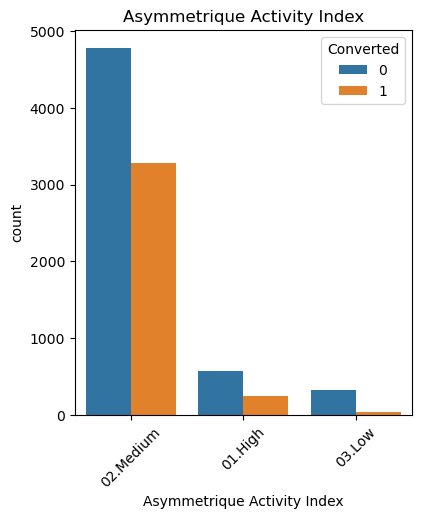

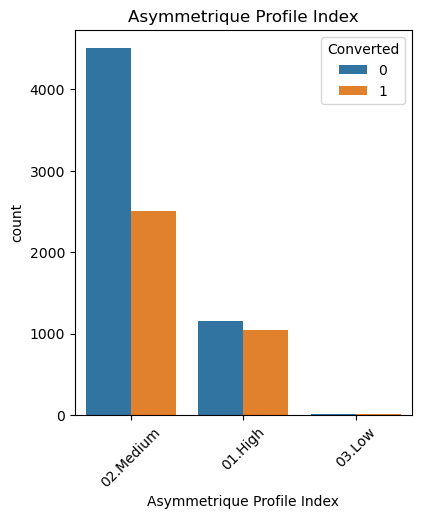

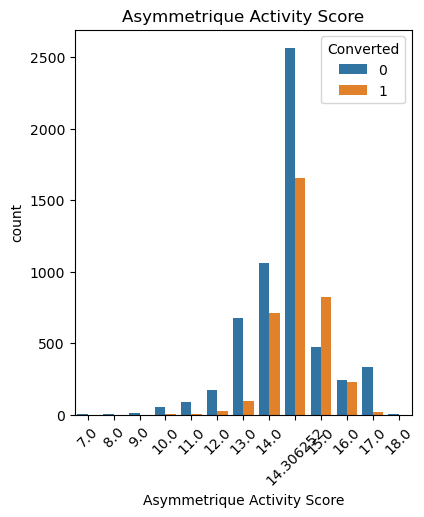

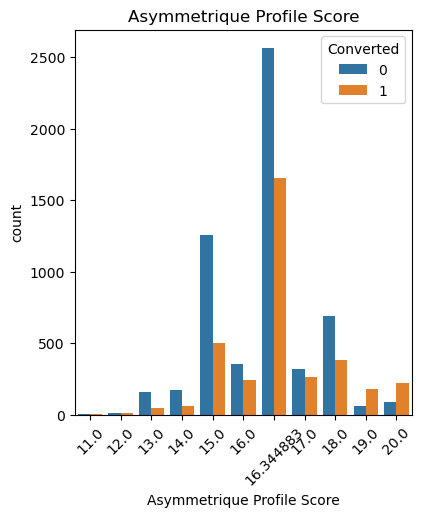

In [44]:
for i, column in enumerate(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 4, i + 1)
    sns.countplot(x=column, hue='Converted', data=df)
    plt.title(column)
    plt.xticks(rotation=45)
    plt.show()

# Insights from above plot::
 
*In the 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', and 'Asymmetrique Profile Score', the variance is    very high.
*Due to this high variance, these columns will not add significant value to the analysis.
Therefore, we will drop these columns from the dataset.

In [45]:
df=df.drop(columns=['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

In [46]:
df.shape

(9240, 29)

In [47]:
df[['Do Not Email','Do Not Call']].describe()

,Do Not Email,Do Not Call
count,9240,9240
unique,2,2
top,No,No
freq,8506,9238


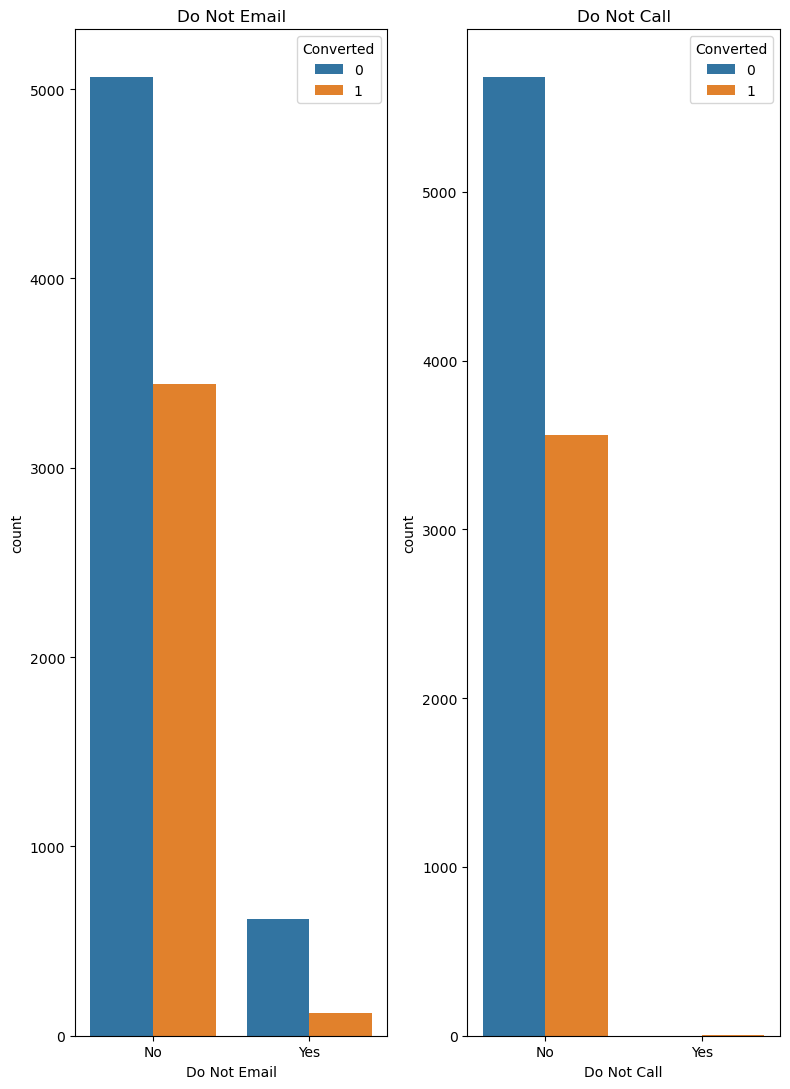

In [48]:
plt.figure(figsize=(8,11))
plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Email', hue='Converted', data=df)
plt.title('Do Not Email')

# Second subplot for 'Do Not Call'
plt.subplot(1, 2, 2)
sns.countplot(x='Do Not Call', hue='Converted', data=df)
plt.title('Do Not Call')

plt.tight_layout()
plt.show()

# Insights from above plot:

 * In the 'Do Not Email' column, more than 85 percent of the values are 'No'.
 *In the 'Do Not Call' column, almost every value is 'No'.
  Since these columns are dominated by a single response, they will not add significant value to our analysis.
  Therefore, we can drop these columns from the dataset.

In [49]:
df=df.drop(columns=['Do Not Email','Do Not Call'])

In [50]:
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [51]:
df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [52]:
df['Country']=df['Country'].fillna('India')

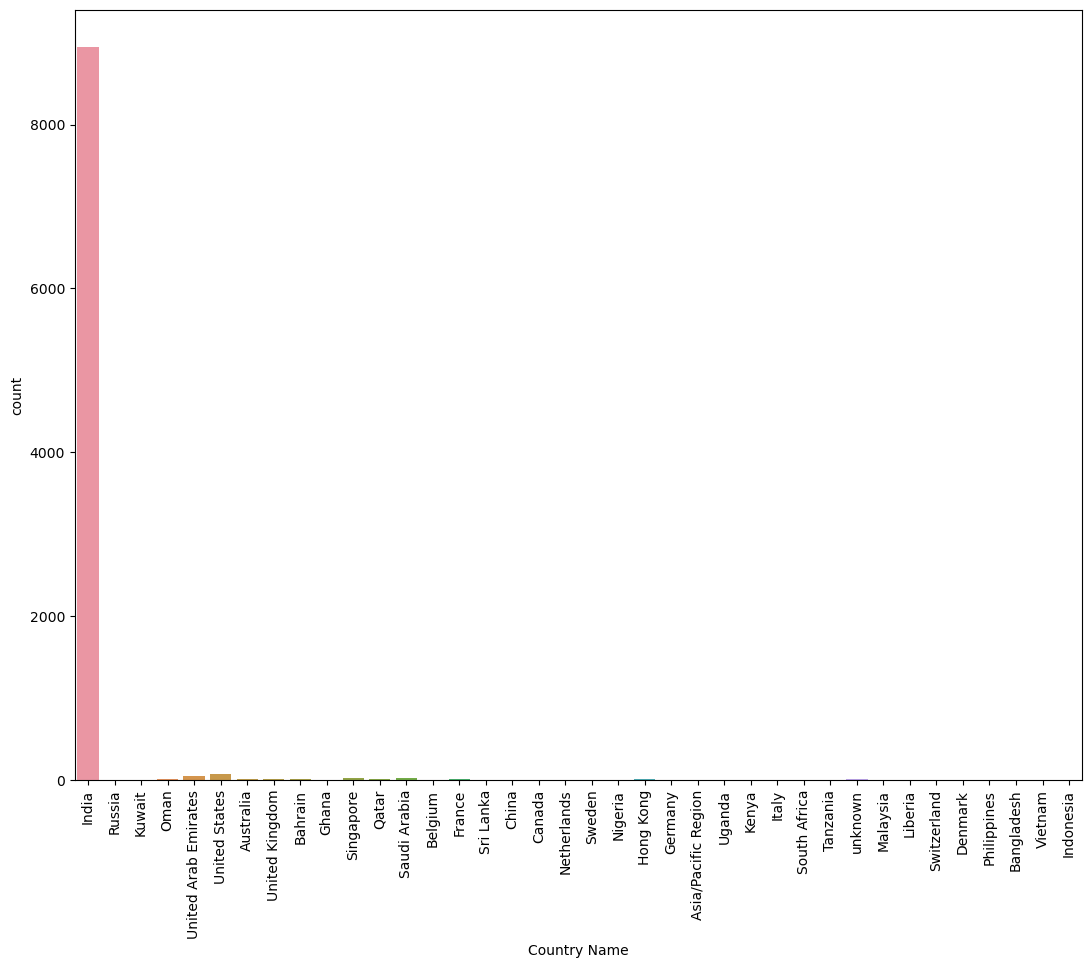

In [53]:
plt.figure(figsize=(13,10))
sns.countplot(x=df['Country'],data=df)
plt.xticks(rotation=90)
plt.xlabel("Country Name")
plt.show()


# Insights from above plot:
 
 * Since almost every cell in 'country' is fill with same data that is 'India'
   it is not going to add any value in future analysis.
   
 * So, we can drop this column from our DataFrame.

In [54]:
df=df.drop(columns='Country')

In [55]:
df.shape

(9240, 26)

In [56]:
df['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [57]:
df['Specialization'].unique()

array([nan, 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [58]:
df['Specialization']=df['Specialization'].replace(np.nan,'unkhnown')

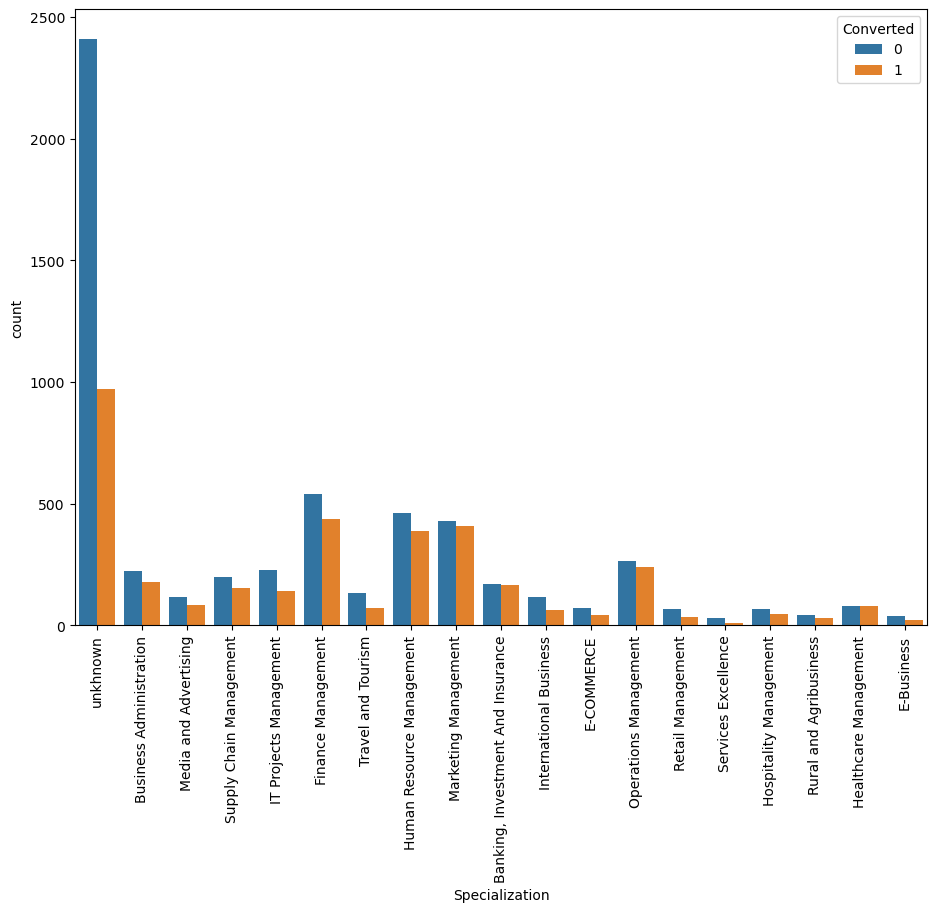

In [59]:
plt.figure(figsize=(11,8))
sns.countplot(x=df['Specialization'],hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

In [60]:
df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [61]:
df=df.fillna('What is your current occupation')

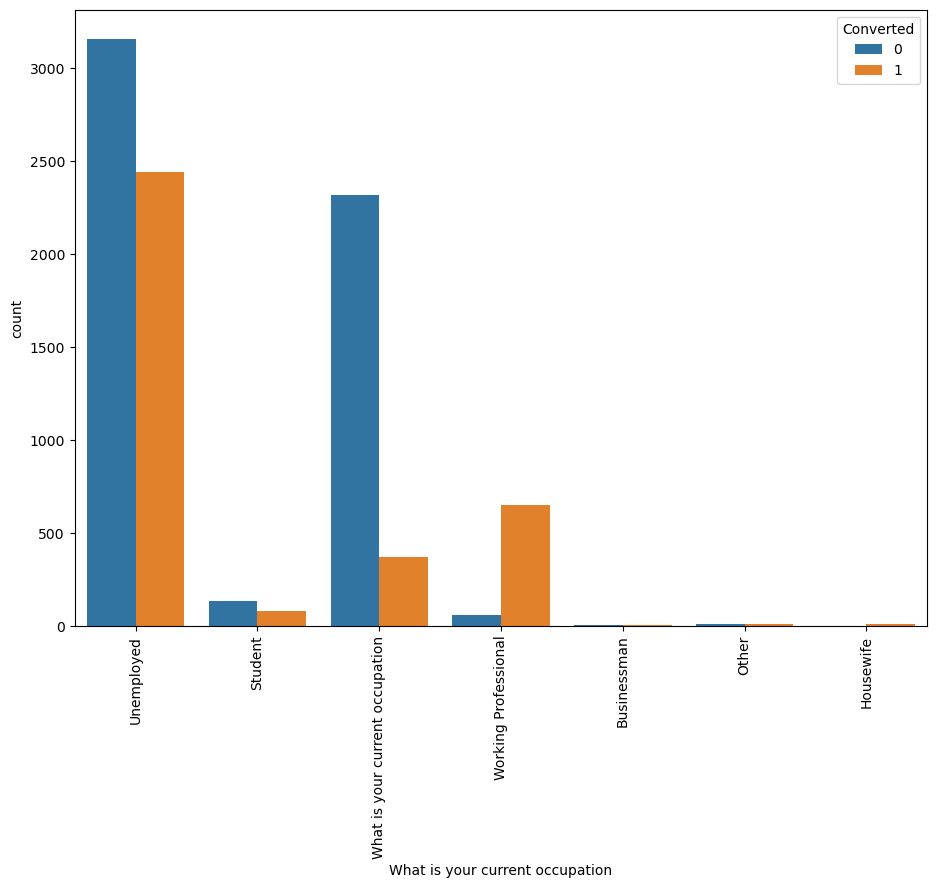

In [62]:
plt.figure(figsize=(11,8))
sns.countplot(x=df['What is your current occupation'],hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

# Insights from above plot:
  
  * Most of the leads are from Unemployed category and the conversion percent out of it is also good.
  * The coversion percent for Working Professional is also very high but the leads in this category is very low . So, we
    need to focus in increase the lead in this cateogry.
  * In Student category number of leads is very less we need to focus on it because it's coversion rate is good.
  * Rest other categories data is very less so, they can be ignored.

In [63]:
df['What matters most to you in choosing a course'].describe()

count                        9240
unique                          4
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [64]:
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].fillna('Better Career Prospects')

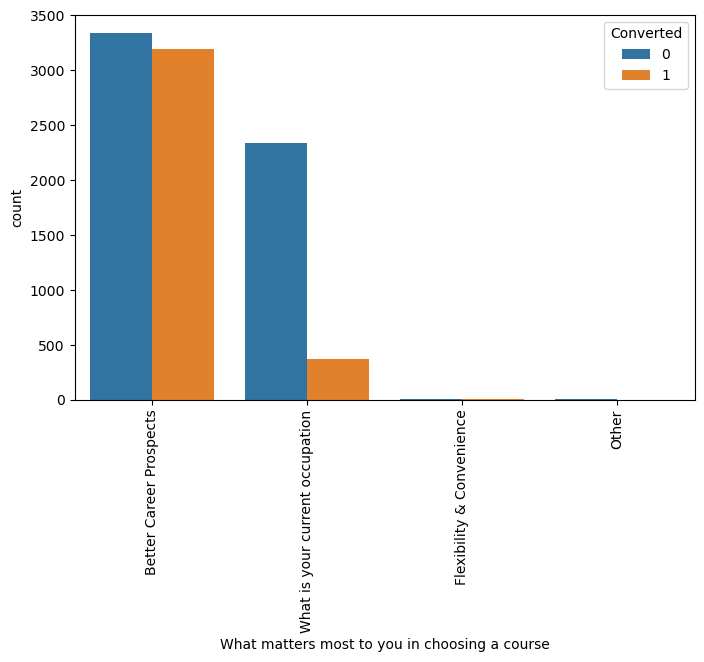

In [65]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['What matters most to you in choosing a course'],hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

# Insights from above plot:

 In the column 'What matters most to you in choosing a course,' most of the values are filled with a single type of response.

This lack of variability suggests that the column might not contribute significantly to our analysis.

Therefore, we can drop this column from the dataset.

In [66]:
df=df.drop(columns='What matters most to you in choosing a course')

In [67]:
df['Search'].describe()

count     9240
unique       2
top         No
freq      9226
Name: Search, dtype: object

In [68]:
df['Magazine'].describe()

count     9240
unique       1
top         No
freq      9240
Name: Magazine, dtype: object

In [69]:
df['Newspaper Article'].describe()

count     9240
unique       2
top         No
freq      9238
Name: Newspaper Article, dtype: object

In [70]:
df['X Education Forums'].describe()

count     9240
unique       2
top         No
freq      9239
Name: X Education Forums, dtype: object

In [71]:
df['Newspaper'].describe()

count     9240
unique       2
top         No
freq      9239
Name: Newspaper, dtype: object

In [72]:
df['Digital Advertisement'].describe()

count     9240
unique       2
top         No
freq      9236
Name: Digital Advertisement, dtype: object

In [73]:
df['Through Recommendations'].describe()

count     9240
unique       2
top         No
freq      9233
Name: Through Recommendations, dtype: object

In [74]:
drop1=['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']

The columns 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', and 'Through Recommendations' are almost entirely filled with the single value 'No'.

Since this lack of variability means these columns will not contribute meaningfully to our analysis, we can drop all the columns listed above.

In [75]:
df=df.drop(columns=['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'])

In [76]:
df.isnull().mean()*100

Prospect ID                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
City                                        0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview      0.0
Last Notable Activity                       0.0
dtype: float64

In [77]:
df['Page Views Per Visit'].describe()

count     9240.0
unique     115.0
top          0.0
freq      2189.0
Name: Page Views Per Visit, dtype: float64

# Checking for outliers:

In [78]:
df['Last Activity'].describe()


count             9240
unique              18
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

In [79]:
df['Last Activity']=df['Last Activity'].replace(np.nan,'Not Known')

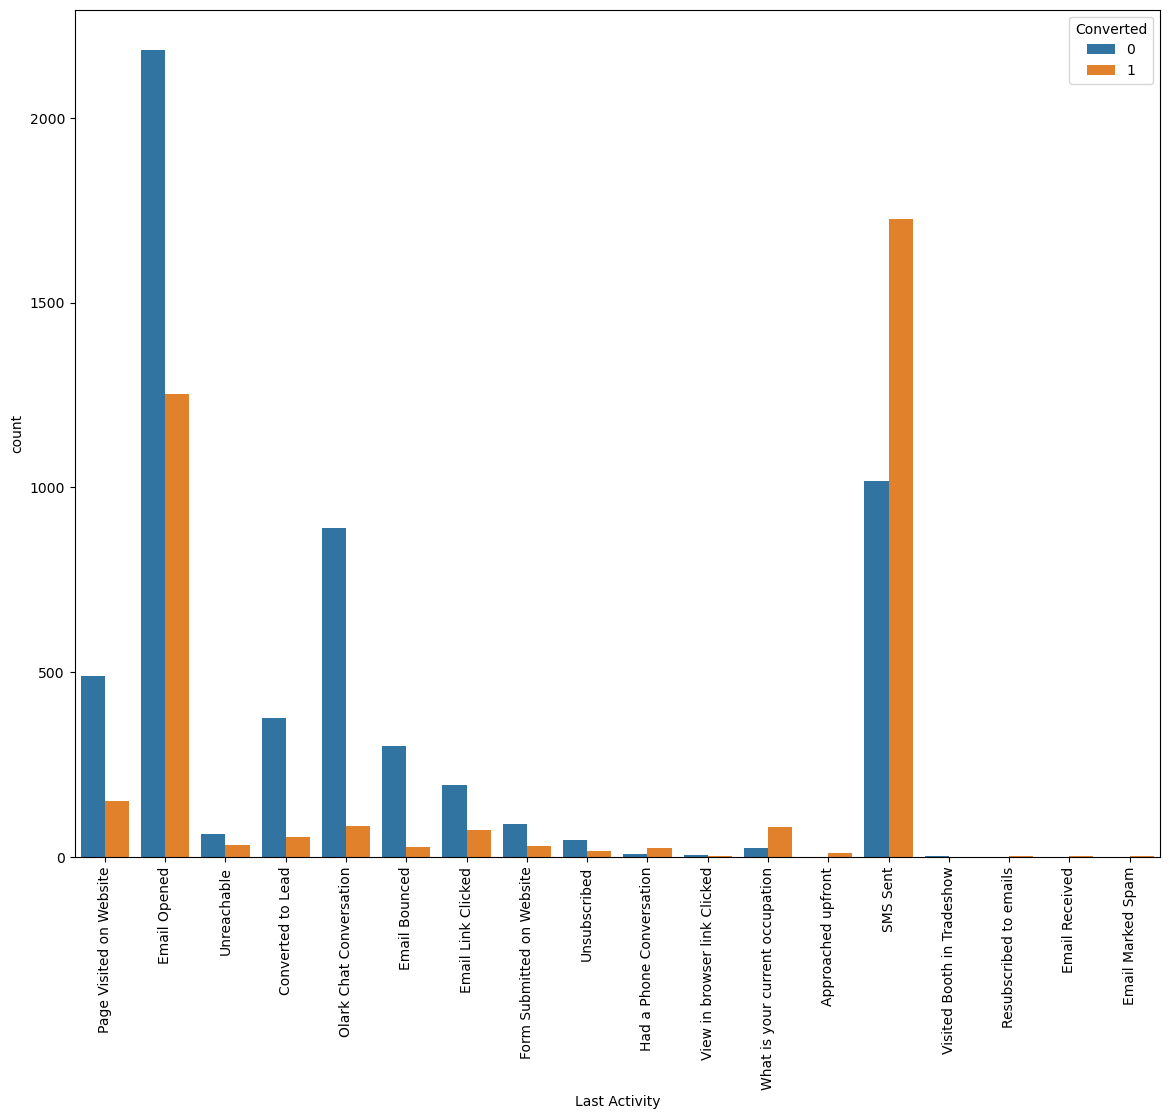

In [80]:
plt.figure(figsize=(14,11))
sns.countplot(x=df['Last Activity'],hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

In [81]:
df['Tags'].describe()

count                                9240
unique                                 27
top       What is your current occupation
freq                                 3353
Name: Tags, dtype: object

In [82]:
df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email',
       'What is your current occupation', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [83]:
df['Tags']=df['Tags'].replace([np.nan,'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'],'Others')

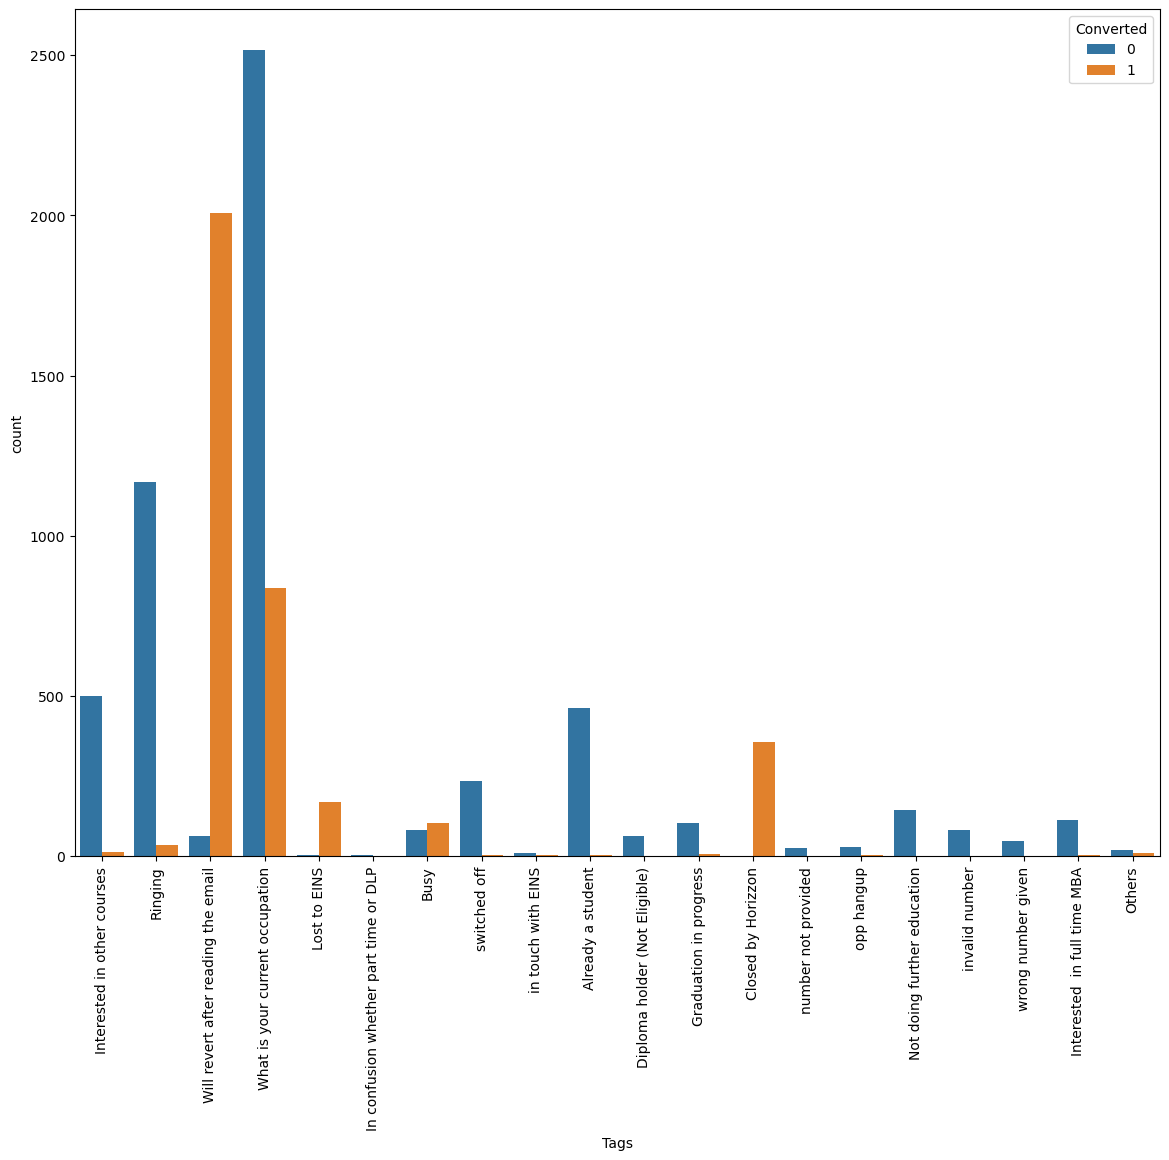

In [84]:
plt.figure(figsize=(14,11))
sns.countplot(x=df['Tags'],hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

In [85]:
df['TotalVisits'].describe()

count     9240.0
unique      42.0
top          0.0
freq      2189.0
Name: TotalVisits, dtype: float64

In [86]:
df['TotalVisits'].unique()

array([0.0, 5.0, 2.0, 1.0, 4.0, 8.0, 11.0, 6.0, 3.0, 7.0, 13.0, 17.0,
       'What is your current occupation', 9.0, 12.0, 10.0, 16.0, 14.0,
       21.0, 15.0, 22.0, 19.0, 18.0, 20.0, 43.0, 30.0, 23.0, 55.0, 141.0,
       25.0, 27.0, 29.0, 24.0, 28.0, 26.0, 74.0, 41.0, 54.0, 115.0, 251.0,
       32.0, 42.0], dtype=object)

In [87]:
df['TotalVisits'] = pd.to_numeric(df['TotalVisits'], errors='coerce')


In [88]:
mean_total_visits =df['TotalVisits'].mean()


In [89]:
mean_total_visits=round(mean_total_visits,2)
mean_total_visits 

3.45

In [90]:
df['TotalVisits'] = df['TotalVisits'].fillna(mean_total_visits)


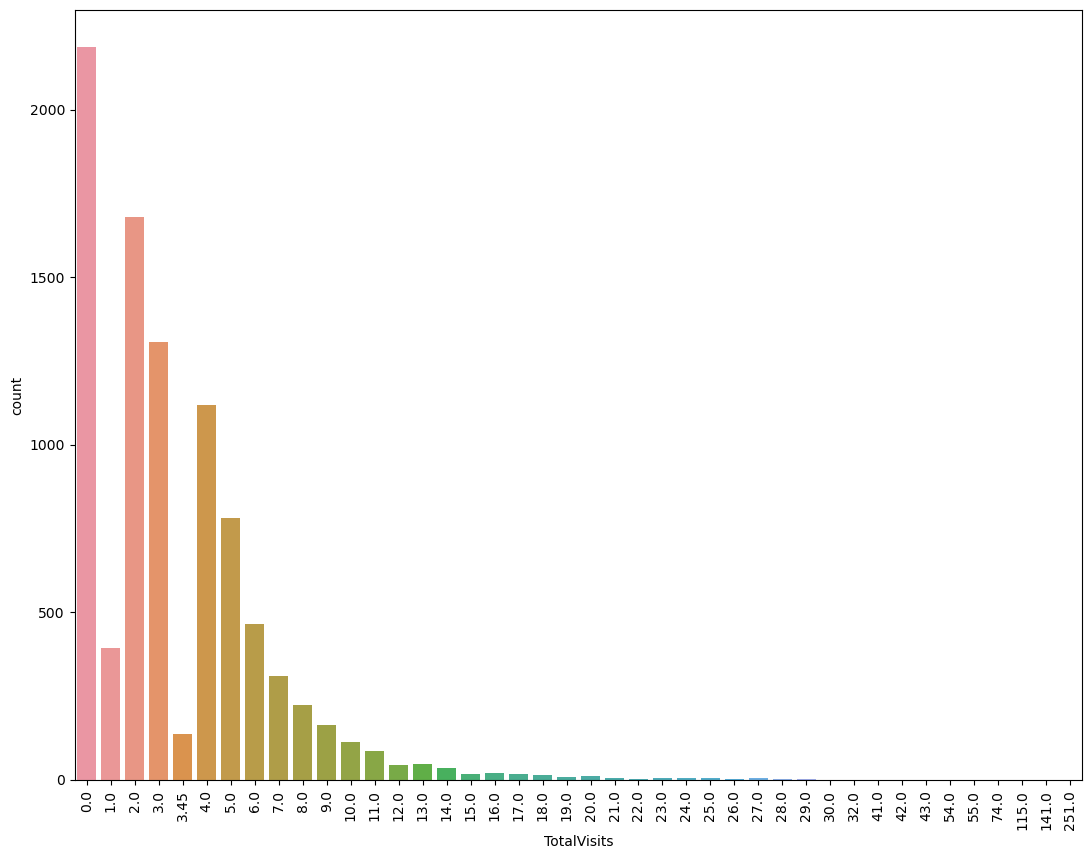

In [91]:
plt.figure(figsize=(13,10))
sns.countplot(x=df['TotalVisits'],data=df)
plt.xticks(rotation=90)
plt.show()

In [92]:
df['Page Views Per Visit']=df['Page Views Per Visit'].replace('What is your current occupation',2.0)

In [93]:
df.isnull().mean()*100

Prospect ID                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
City                                        0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview      0.0
Last Notable Activity                       0.0
dtype: float64

In [94]:
df['I agree to pay the amount through cheque'].describe()

count     9240
unique       1
top         No
freq      9240
Name: I agree to pay the amount through cheque, dtype: object

# 
 * Since all the value in column 'I agree to pay the amount through cheque' filled with only one value
 * this is not add anything valuable in our analysis so, droping this column.

In [95]:
df=df.drop(columns='I agree to pay the amount through cheque')

In [96]:
df['A free copy of Mastering The Interview'].describe()

count     9240
unique       2
top         No
freq      6352
Name: A free copy of Mastering The Interview, dtype: object

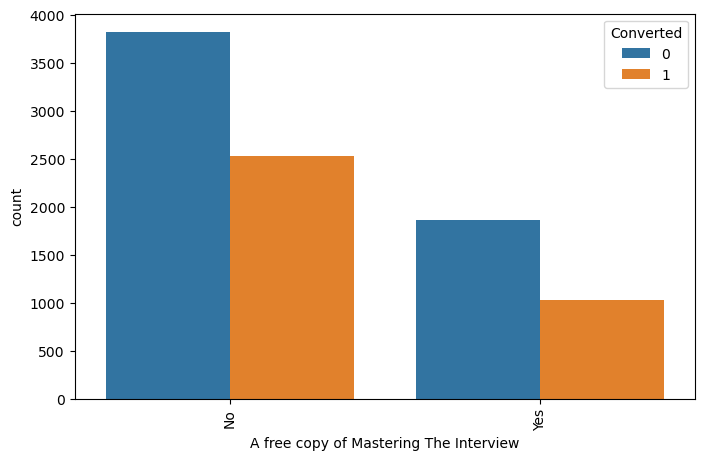

In [97]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['A free copy of Mastering The Interview'],hue='Converted',data=df)
plt.xticks(rotation=90)
plt.show()

In [98]:
df=df.drop(columns=['Update me on Supply Chain Content','Get updates on DM Content'])

In [99]:
df=df.drop(columns=['A free copy of Mastering The Interview','Receive More Updates About Our Courses'])

In [100]:
## Separate numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Separate categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the results
print("Numerical columns:", numerical_columns)
print("\nCategorical columns:", categorical_columns)


Numerical columns: ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

Categorical columns: ['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']


# Checking for outliers:

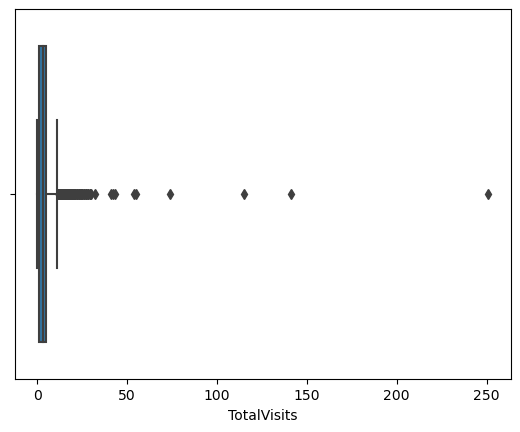

In [101]:
sns.boxplot(x=df['TotalVisits'])
plt.show()

In [102]:
percentile = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentile[0]] = percentile[0]
df['TotalVisits'][df['TotalVisits'] >= percentile[1]] = percentile[1]

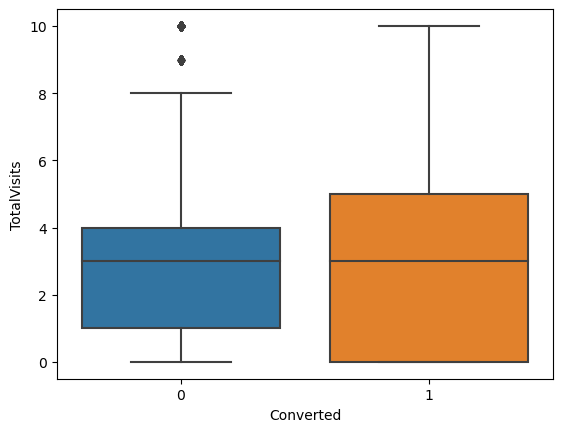

In [103]:
sns.boxplot(y='TotalVisits',x='Converted',data=df)
plt.show()

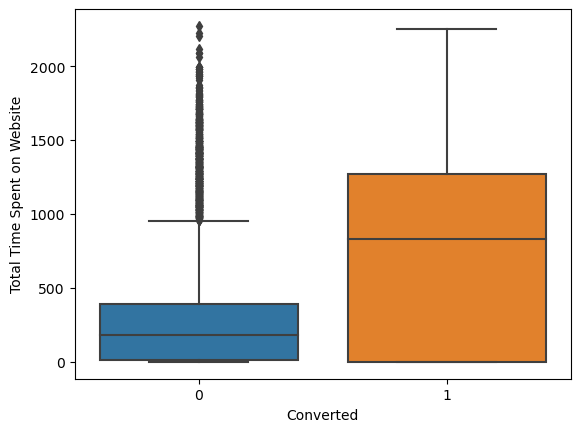

In [104]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

In [105]:
df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [106]:
h1=['Prospect ID', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity']

# Heatmap:

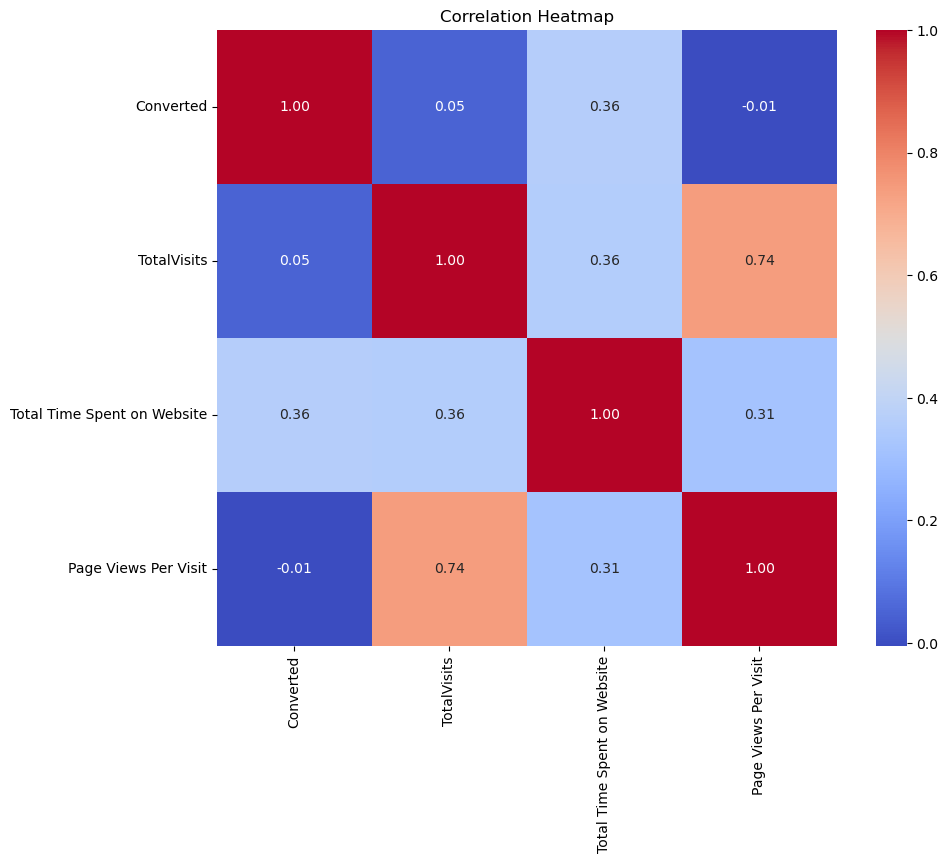

In [107]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Data Preparation:
 

# Creating dummy variable for categorical columns:

In [108]:
dummy=pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']], drop_first=True)


In [109]:
dummy.head()

,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2.5,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1.0,True,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [110]:
dummy=dummy.astype(int)

In [111]:
df = pd.concat([df, dummy], axis=1)

In [112]:
df.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,unkhnown,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,unkhnown,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,unkhnown,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [113]:
df = df.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','City','Last Notable Activity'])

In [114]:

df.head(10)

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,2058ef08-2858-443e-a01f-a9237db2f5ce,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,1,2.0,1640,2.0,2,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,0,2.0,71,2.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,af465dfc-7204-4130-9e05-33231863c4b5,0,4.0,58,4.0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Performing Machine Learning:

In [115]:
x = df.drop(['Prospect ID','Converted'], axis=1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [116]:
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [117]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

# Scaling:

In [118]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-1.152144,-0.885371,-1.085519,-1.051699,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.297213,0.005716,-0.470569,-0.590301,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.659552,-0.691418,0.070401,-0.128903,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.659552,1.365219,1.226321,1.255291,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,-1.152144,-0.885371,-1.085519,-1.051699,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Model Building:
 
 * Logistic regression model

In [119]:
import statsmodels.api as sm

In [120]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6375
Model Family:                Binomial   Df Model:                           92
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 01 Jul 2024   Deviance:                       66591.
Time:                        22:39:39   Pearson chi2:                 3.26e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                            1.469e+15   3.69e+07   3.99e+07      0.000    1.47e+15    1.47e+15
TotalVisits                                                      9.512e+13   1.71e+06   5.57e+07      0.000    9.51e+13    9.51e+13
Total Time Spent on Website                                      3.502e+14   1.02e+06   3.42e+08      0.000     3.5e+14     3.5e+14
Page Views Per Visit                                            -7.086e+13    1.4e+07  -5.07e+06      0.000   -7.09e+13   -7.09e+13
Page Views Per Visit                                            -3.307e+12   1.32e+07   -2.5e+05      0.000   -3.31e+12   -3.31e+12
Lead Origin_Landing Page Submission                             -1.895e+14   3.39e+06  -5.59e+07      0.000    -1.9e+14    -1.9e+14
Lead Origin_Lead Add Form                                       -9.113e+13   1.24e+07  -7.38e+06      0.000   -9.11e+13   -9.11e+13
Lead Origin_Lead Import                                          4.225e+15   4.88e+07   8.66e+07      0.000    4.22e+15    4.22e+15
Lead Origin_Quick Add Form                                       4.066e+15    6.8e+07   5.98e+07      0.000    4.07e+15    4.07e+15
Lead Source_Facebook                                            -4.147e+15   4.87e+07  -8.51e+07      0.000   -4.15e+15   -4.15e+15
Lead Source_Google                                               9.406e+13   2.45e+06   3.84e+07      0.000    9.41e+13    9.41e+13
Lead Source_Olark Chat                                          -1.233e+13   3.87e+06  -3.19e+06      0.000   -1.23e+13   -1.23e+13
Lead Source_Organic Search                                       8.507e+13   3.23e+06   2.64e+07      0.000    8.51e+13    8.51e+13
Lead Source_Reference                                            2.043e+14   1.28e+07   1.59e+07      0.000    2.04e+14    2.04e+14
Lead Source_Referral Sites                                       1.071e+14   7.57e+06   1.42e+07      0.000    1.07e+14    1.07e+14
Lead Source_Unknown                                              8.605e+13   1.63e+07   5.26e+06      0.000    8.61e+13    8.61e+13
Lead Source_Welingak Website                                     1.548e+15   1.42e+07   1.09e+08      0.000    1.55e+15    1.55e+15
Last Activity_Converted to Lead                                 -3.686e+15   2.81e+07  -1.31e+08      0.000   -3.69e+15   -3.69e+15
Last Activity_Email Bounced                                     -4.007e+15   2.82e+07  -1.42e+08      0.000   -4.01e+15   -4.01e+15
Last Activity_Email Link Clicked                                 -3.66e+15    2.9e+07  -1.26e+08      0.000   -3.66e+15   -3.66e+15
Last Activity_Email Marked Spam                

# Feature Selection Using RFE:

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize the RFE model with 20 features
rfe = RFE(estimator=logreg, n_features_to_select=20)             

# Fit the RFE model
rfe = rfe.fit(X_train, y_train)


In [122]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False])

In [123]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 34),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 55),
 ('Page Views Per Visit', False, 56),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 59),
 ('Lead Origin_Quick Add Form', False, 35),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 74),
 ('Lead Source_Reference', False, 39),
 ('Lead Source_Referral Sites', False, 65),
 ('Lead Source_Unknown', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 18),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 32),
 ('Last Activity_Email Marked Spam', False, 72),
 ('Last Activity_Email Opened', False, 33),
 ('Last Activity_Email Received', False, 60),
 ('Last Activity_Form Submitted on Website', False, 50),
 ('Last Acti

In [124]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent',
       'What is your current occupation_What is your current occupation',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Others', 'Tags_Ringing',
       'Tags_What is your current occupation',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [125]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Unknown',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
  

# Steps to Assess a Model with StatsModels:

In [126]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.2
Date:                Mon, 01 Jul 2024   Deviance:                       2524.4
Time:                        22:39:42   Pearson chi2:                 1.65e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6090
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1791      0.223    -14.271      0.000      -3.616      -2.742
Lead Source_Welingak Website                                        2.7575      0.752      3.666      0.000       1.283       4.232
Last Activity_Email Bounced                                        -0.8258      0.363     -2.278      0.023      -1.536      -0.115
Last Activity_SMS Sent                                              2.1709      0.122     17.743      0.000       1.931       2.411
What is your current occupation_What is your current occupation    -2.5835      0.147    -17.579      0.000      -2.872      -2.295
Tags_Busy                                                           2.2317      0.306      7.294      0.000       1.632       2.831
Tags_Closed by Horizzon                                             9.7177      1.029      9.441      0.000       7.700      11.735
Tags_Diploma holder (Not Eligible)                                -20.8744   1.84e+04     -0.001      0.999   -3.62e+04    3.61e+04
Tags_Lost to EINS                                                   9.7457      0.779     12.515      0.000       8.219      11.272
Tags_Not doing further education                                   -0.9818      1.043     -0.941      0.347      -3.027       1.063
Tags_Others                                                         2.9130      0.554      5.259      0.000       1.827       3.999
Tags_Ringing                                                       -1.5205      0.310     -4.898      0.000      -2.129      -0.912
Tags_What is your current occupation                                3.7056      0.248     14.925      0.000       3.219       4.192
Tags_Will revert after reading the email                            6.5576      0.270     24.270      0.000       6.028       7.087
Tags_in touch with EINS                                             2.2894      0.787      2.908      0.004       0.746       3.833
Tags_invalid number                                                -2.0575      1.046     -1.967      0.049      -4.108      -0.007
Tags_number not provided                                          -22.1782   2.51e+04     -0.001      0.999   -4.92e+04    4.92e+04
Tags_switched off                                                  -1.9881      0.562     -3.537      0.000      -3.090      -0.886
Tags_wrong number given                                           -22.3595   2.14e+04     -0.001      0.999   -4.19e+04    4.19e+04
Last Notable Activity_Modified                                     -1.5361      0.123    -12.461      0.000      -1.778      -1.295
Last Notable Activity_Olark Chat Conversation  

In [127]:
col1 = col.drop('Tags_wrong number given',1)

In [128]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1265.6
Date:                Mon, 01 Jul 2024   Deviance:                       2531.1
Time:                        22:39:42   Pearson chi2:                 1.62e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6086
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.3180      0.224    -14.807      0.000      -3.757      -2.879
Lead Source_Welingak Website                                        2.7544      0.752      3.664      0.000       1.281       4.228
Last Activity_Email Bounced                                        -0.8311      0.362     -2.293      0.022      -1.542      -0.121
Last Activity_SMS Sent                                              2.1461      0.121     17.679      0.000       1.908       2.384
What is your current occupation_What is your current occupation    -2.5762      0.146    -17.588      0.000      -2.863      -2.289
Tags_Busy                                                           2.3840      0.305      7.822      0.000       1.787       2.981
Tags_Closed by Horizzon                                             9.8477      1.030      9.562      0.000       7.829      11.866
Tags_Diploma holder (Not Eligible)                                -20.7365   1.84e+04     -0.001      0.999   -3.62e+04    3.61e+04
Tags_Lost to EINS                                                   9.8704      0.779     12.663      0.000       8.343      11.398
Tags_Not doing further education                                   -0.8377      1.043     -0.803      0.422      -2.882       1.207
Tags_Others                                                         3.0596      0.552      5.538      0.000       1.977       4.142
Tags_Ringing                                                       -1.3612      0.308     -4.412      0.000      -1.966      -0.757
Tags_What is your current occupation                                3.8456      0.249     15.434      0.000       3.357       4.334
Tags_Will revert after reading the email                            6.6934      0.272     24.644      0.000       6.161       7.226
Tags_in touch with EINS                                             2.4308      0.786      3.091      0.002       0.890       3.972
Tags_invalid number                                                -1.8977      1.045     -1.816      0.069      -3.946       0.151
Tags_number not provided                                          -22.0212   2.51e+04     -0.001      0.999   -4.93e+04    4.93e+04
Tags_switched off                                                  -1.8273      0.561     -3.258      0.001      -2.927      -0.728
Last Notable Activity_Modified                                     -1.5250      0.123    -12.385      0.000      -1.766      -1.284
Last Notable Activity_Olark Chat Conversation                      -1.1866      0.419     -2.831      0.005      -2.008      -0.365
===============================================

In [129]:
col2 = col1.drop('Tags_Not doing further education',1)

In [130]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1266.0
Date:                Mon, 01 Jul 2024   Deviance:                       2532.0
Time:                        22:39:42   Pearson chi2:                 1.62e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6085
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.3713      0.219    -15.377      0.000      -3.801      -2.942
Lead Source_Welingak Website                                        2.7544      0.752      3.664      0.000       1.281       4.228
Last Activity_Email Bounced                                        -0.8407      0.361     -2.328      0.020      -1.549      -0.133
Last Activity_SMS Sent                                              2.1462      0.121     17.680      0.000       1.908       2.384
What is your current occupation_What is your current occupation    -2.5767      0.146    -17.591      0.000      -2.864      -2.290
Tags_Busy                                                           2.4372      0.301      8.092      0.000       1.847       3.028
Tags_Closed by Horizzon                                             9.9017      1.029      9.625      0.000       7.885      11.918
Tags_Diploma holder (Not Eligible)                                -20.6830   1.84e+04     -0.001      0.999   -3.62e+04    3.61e+04
Tags_Lost to EINS                                                   9.9251      0.778     12.756      0.000       8.400      11.450
Tags_Others                                                         3.1131      0.550      5.655      0.000       2.034       4.192
Tags_Ringing                                                       -1.3080      0.305     -4.289      0.000      -1.906      -0.710
Tags_What is your current occupation                                3.8994      0.245     15.940      0.000       3.420       4.379
Tags_Will revert after reading the email                            6.7473      0.267     25.227      0.000       6.223       7.272
Tags_in touch with EINS                                             2.4841      0.785      3.165      0.002       0.946       4.023
Tags_invalid number                                                -1.8445      1.044     -1.766      0.077      -3.891       0.202
Tags_number not provided                                          -21.9676   2.51e+04     -0.001      0.999   -4.93e+04    4.93e+04
Tags_switched off                                                  -1.7741      0.559     -3.174      0.002      -2.870      -0.679
Last Notable Activity_Modified                                     -1.5254      0.123    -12.390      0.000      -1.767      -1.284
Last Notable Activity_Olark Chat Conversation                      -1.1849      0.419     -2.826      0.005      -2.007      -0.363
===================================================================================================================================
"""

In [131]:
col3 = col2.drop('Tags_Closed by Horizzon',1)

In [132]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1820.3
Date:                Mon, 01 Jul 2024   Deviance:                       3640.6
Time:                        22:39:42   Pearson chi2:                 8.82e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5354
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -0.9073      0.087    -10.396      0.000      -1.078      -0.736
Lead Source_Welingak Website                                        3.8064      0.743      5.124      0.000       2.350       5.262
Last Activity_Email Bounced                                        -1.2002      0.300     -4.004      0.000      -1.788      -0.613
Last Activity_SMS Sent                                              1.8024      0.105     17.188      0.000       1.597       2.008
What is your current occupation_What is your current occupation    -2.4986      0.137    -18.227      0.000      -2.767      -2.230
Tags_Busy                                                           0.0923      0.221      0.417      0.677      -0.341       0.526
Tags_Diploma holder (Not Eligible)                                -23.2982   1.87e+04     -0.001      0.999   -3.66e+04    3.66e+04
Tags_Lost to EINS                                                   7.0157      0.744      9.427      0.000       5.557       8.474
Tags_Others                                                         0.5290      0.482      1.097      0.273      -0.416       1.474
Tags_Ringing                                                       -3.5180      0.233    -15.085      0.000      -3.975      -3.061
Tags_What is your current occupation                                1.3488      0.136      9.953      0.000       1.083       1.614
Tags_Will revert after reading the email                            4.0937      0.172     23.833      0.000       3.757       4.430
Tags_in touch with EINS                                            -0.0773      0.733     -0.105      0.916      -1.515       1.360
Tags_invalid number                                                -4.0463      1.023     -3.954      0.000      -6.052      -2.041
Tags_number not provided                                          -24.2037   2.57e+04     -0.001      0.999   -5.05e+04    5.04e+04
Tags_switched off                                                  -3.9587      0.523     -7.574      0.000      -4.983      -2.934
Last Notable Activity_Modified                                     -0.9877      0.093    -10.624      0.000      -1.170      -0.806
Last Notable Activity_Olark Chat Conversation                      -1.0726      0.348     -3.085      0.002      -1.754      -0.391
===================================================================================================================================
"""

# Getting the predicted values on the train set:


In [133]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:20]

1871    0.011829
6795    0.608633
3516    0.011829
8105    0.067679
3934    0.366758
4844    0.993232
3297    0.011829
8071    0.130678
987     0.045443
7423    0.993232
1032    0.904127
6542    0.904127
4317    0.960321
6472    0.960321
712     0.004438
3960    0.113340
4654    0.113340
5902    0.014134
4691    0.113340
4341    0.960321
dtype: float64

In [134]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:20]

array([0.01182919, 0.60863271, 0.01182919, 0.06767872, 0.36675789,
       0.99323236, 0.01182919, 0.13067805, 0.04544316, 0.99323236,
       0.90412721, 0.90412721, 0.96032054, 0.96032054, 0.00443844,
       0.11334039, 0.11334039, 0.0141338 , 0.11334039, 0.96032054])

In [135]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
0,0,0.011829,1871
1,0,0.608633,6795
2,0,0.011829,3516
3,0,0.067679,8105
4,0,0.366758,3934
5,1,0.993232,4844
6,0,0.011829,3297
7,1,0.130678,8071
8,0,0.045443,987
9,1,0.993232,7423


# 
 * Creating a new column 'predicted' where the value is 1 if 'Churn_Prob' exceeds 0.5, otherwise 0

In [136]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.011829,1871,0
1,0,0.608633,6795,1
2,0,0.011829,3516,0
3,0,0.067679,8105,0
4,0,0.366758,3934,0
5,1,0.993232,4844,1
6,0,0.011829,3297,0
7,1,0.130678,8071,0
8,0,0.045443,987,0
9,1,0.993232,7423,1


In [137]:
from sklearn import metrics

# Confusion matrix :

In [138]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3834  168]
 [ 571 1895]]


# 
 * Let's check the overall accuracy.

In [139]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8857452071737786


# Checking VIF:

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,5.00
3,What is your current occupation_What is your c...,4.66
2,Last Activity_SMS Sent,1.68
12,Tags_in touch with EINS,1.37
10,Tags_What is your current occupation,1.13
0,Lead Source_Welingak Website,1.12
1,Last Activity_Email Bounced,1.11
5,Tags_Closed by Horizzon,1.07
7,Tags_Lost to EINS,1.06
8,Tags_Others,1.05


# Metrics beyond simply accuracy:

In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7684509326845094

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.9580209895052474

In [145]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.041979010494752625


In [146]:
# positive predictive value 
print (TP / float(TP+FP))

0.9185651963160446


In [147]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8703745743473326


# Plotting the ROC Curve:

In [148]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [149]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

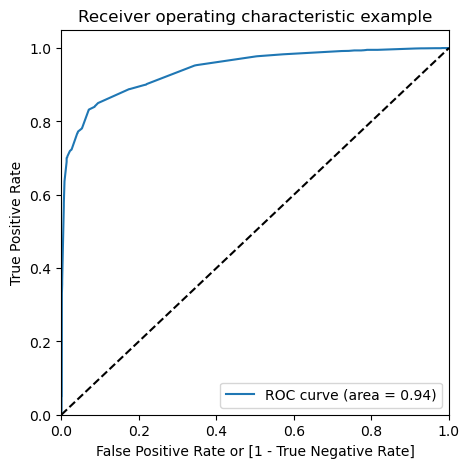

In [150]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Finding Optimal Cutoff Point:

In [151]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.011829,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.608633,6795,1,1,1,1,1,1,1,1,0,0,0
2,0,0.011829,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.067679,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.366758,3934,0,1,1,1,1,0,0,0,0,0,0
5,1,0.993232,4844,1,1,1,1,1,1,1,1,1,1,1
6,0,0.011829,3297,0,1,0,0,0,0,0,0,0,0,0
7,1,0.130678,8071,0,1,1,0,0,0,0,0,0,0,0
8,0,0.045443,987,0,1,0,0,0,0,0,0,0,0,0
9,1,0.993232,7423,1,1,1,1,1,1,1,1,1,1,1


In [152]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.678726  0.977697  0.494503
0.2   0.2  0.828850  0.899432  0.785357
0.3   0.3  0.884354  0.849959  0.905547
0.4   0.4  0.892239  0.832117  0.929285
0.5   0.5  0.885745  0.768451  0.958021
0.6   0.6  0.885745  0.768451  0.958021
0.7   0.7  0.878169  0.723439  0.973513
0.8   0.8  0.877396  0.700324  0.986507
0.9   0.9  0.873377  0.689781  0.986507


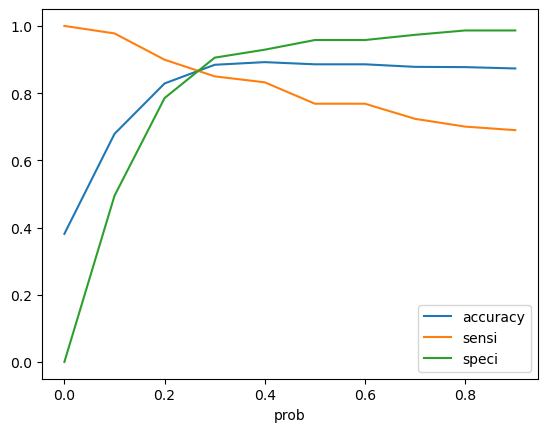

In [153]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# 
* From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

In [154]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.011829,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.608633,6795,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.011829,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.067679,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.366758,3934,0,1,1,1,1,0,0,0,0,0,0,1


In [155]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.011829,1871,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.608633,6795,1,1,1,1,1,1,1,1,0,0,0,1,61
2,0,0.011829,3516,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0.067679,8105,0,1,0,0,0,0,0,0,0,0,0,0,7
4,0,0.366758,3934,0,1,1,1,1,0,0,0,0,0,0,1,37
5,1,0.993232,4844,1,1,1,1,1,1,1,1,1,1,1,1,99
6,0,0.011829,3297,0,1,0,0,0,0,0,0,0,0,0,0,1
7,1,0.130678,8071,0,1,1,0,0,0,0,0,0,0,0,0,13
8,0,0.045443,987,0,1,0,0,0,0,0,0,0,0,0,0,5
9,1,0.993232,7423,1,1,1,1,1,1,1,1,1,1,1,1,99


In [156]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [157]:
#sensitivity of model
TP / float(TP+FN)


0.8880778588807786

In [158]:
# specificity
TN / float(TN+FP)

0.8238380809595203

In [159]:
#false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17616191904047976


In [160]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9227539882451721


In [161]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3834,  168],
       [ 571, 1895]], dtype=int64)

# Precision:

In [162]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9185651963160446

# Recall:

In [163]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7684509326845094

In [164]:
from sklearn.metrics import precision_score, recall_score

In [165]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9185651963160446

In [166]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7684509326845094

In [167]:
from sklearn.metrics import precision_recall_curve

In [168]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [169]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

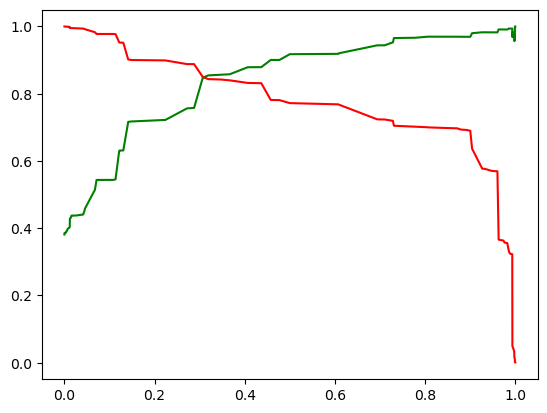

In [170]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Doing predictions on the test set:

In [171]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head(10)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-1.152144,-0.885371,-1.085519,-1.051699,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.297213,0.005716,-0.470569,-0.590301,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.659552,-0.691418,0.070401,-0.128903,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.659552,1.365219,1.226321,1.255291,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,-1.152144,-0.885371,-1.085519,-1.051699,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4844,0.297213,1.862910,-0.160783,-0.128903,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3297,1.384231,-0.729842,0.532769,0.332495,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8071,0.097926,-0.261427,-0.160783,-0.128903,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
987,-0.789805,0.605874,-0.623151,-0.590301,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7423,-0.065126,1.974525,-0.391967,-0.590301,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [172]:
X_test = X_test[col3]
X_test.head(10)

,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,What is your current occupation_What is your current occupation,Tags_Busy,Tags_Diploma holder (Not Eligible),Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_What is your current occupation,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2376,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7766,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4359,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9186,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1631,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8963,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8007,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
5324,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [173]:
X_test_sm = sm.add_constant(X_test)

In [174]:
y_test_pred = res.predict(X_test_sm)

In [175]:
y_test_pred[:20]

4269    0.436670
2376    0.993232
7766    0.960321
9199    0.130678
4359    0.960321
9186    0.993232
1631    0.960321
8963    0.960321
8007    0.045443
5324    0.993232
2558    0.045443
8973    0.011829
2935    0.728569
2907    0.993232
957     0.960321
493     0.960321
3179    0.960321
3545    0.045443
6140    0.041902
4877    0.728569
dtype: float64

In [176]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [177]:
y_test_df = pd.DataFrame(y_test)

In [178]:
y_test_df['Prospect ID'] = y_test_df.index

In [179]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [180]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [181]:
y_pred_final.head(10)

,Converted,Prospect ID,0
0,1,4269,0.436670
1,1,2376,0.993232
2,1,7766,0.960321
3,0,9199,0.130678
4,1,4359,0.960321
5,1,9186,0.993232
6,1,1631,0.960321
7,1,8963,0.960321
8,0,8007,0.045443
9,1,5324,0.993232


In [182]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [183]:
# Rearranging the columns
columns_titles = ['Prospect ID','Converted','Converted_prob']
y_pred_final=y_pred_final.reindex(columns=columns_titles)

In [184]:
y_pred_final.head(10)

,Prospect ID,Converted,Converted_prob
0,4269,1,0.436670
1,2376,1,0.993232
2,7766,1,0.960321
3,9199,0,0.130678
4,4359,1,0.960321
5,9186,1,0.993232
6,1631,1,0.960321
7,8963,1,0.960321
8,8007,0,0.045443
9,5324,1,0.993232


In [185]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [186]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,4269,1,0.436670,1
1,2376,1,0.993232,1
2,7766,1,0.960321,1
3,9199,0,0.130678,0
4,4359,1,0.960321,1


In [187]:
y_pred_final.head(10)

,Prospect ID,Converted,Converted_prob,final_predicted
0,4269,1,0.436670,1
1,2376,1,0.993232,1
2,7766,1,0.960321,1
3,9199,0,0.130678,0
4,4359,1,0.960321,1
5,9186,1,0.993232,1
6,1631,1,0.960321,1
7,8963,1,0.960321,1
8,8007,0,0.045443,0
9,5324,1,0.993232,1


# Overall Accuracy:

In [188]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8459595959595959

In [189]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1364,  313],
       [ 114,  981]], dtype=int64)

In [190]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# 
 * Sensitivity of Logistic Regression Model

In [192]:
TP / float(TP+FN)

0.8958904109589041

# 
 * Specificity of Model:

In [193]:
TN / float(TN+FP)

0.8133571854502087

# Conclusion:
 
 * Results after running the model on the training and test datasets:

 # Training Dataset:

 * Accuracy: 88.57%
 * Sensitivity: 76.84%
 * Specificity: 95.80%
 
 # Test Dataset:

 * Accuracy: 84.61%
 * Sensitivity: 89.59%
 * Specificity: 81.34%